# Defining custom operators

In this notebook we are going to show how you can define custom operators that can be used with any metaheuristic algorithm.

We will give a number of different ways of doing it, so you can choose which one is more appropiate for you.

In [15]:
import metaheuristic_designer as mhd
from metaheuristic_designer import GeneralSearch, Operator
from metaheuristic_designer.Operators import OperatorLambda
from metaheuristic_designer.Algorithms import HillClimb
from metaheuristic_designer.Initializers import UniformVectorInitializer
from metaheuristic_designer.benchmarks import Sphere
from copy import copy
import numpy as np
import random

## With an already defined function

Let's say you have an already programmed function that will serve as a mutation or a cross operator for an algorithm. To use it in this framework, it will need to accept 4 parameters:
- An individual that we are attempting to modify.
- A population of individuals that are the parents selected for mutation.
- The objective function we are optimizing.
- A dictionary with other additional parameters.

Here's an example.


In [16]:
def mutate_custom(indiv, population, objfunc, **params):
    vector = indiv.genotype
    return vector + np.random.normal(0, params["F"], vector.shape)

To convert it into an operator, we will pass it to the ```OperatorLambda``` class to along with its name and other parameters.

In [17]:
operator = OperatorLambda(mutate_custom, name="GaussianNoise_lambda", params={"F": 1e-3})

Now we can directly use it with any algorithm we want, in this case, we will use it in a Hill Climb algorithm.

In [18]:
# Define the parameters of the optimization process
params = {
    "stop_cond": "time_limit",
    "time_limit": 10.0,

    "verbose": True,
    "v_timer": 2
}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(objfunc.vecsize, objfunc.low_lim, objfunc.up_lim, pop_size=1)

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, operator)

# Define a Search method
search = GeneralSearch(objfunc, algorithm, params)

# Optimize the objective function 
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 4310.2124249167
	Evaluations of fitness: 1

Optimizing Sphere function using HillClimb:
	Real time Spent: 2.0 s
	CPU time Spent:  2.0 s
	Generation: 131402
	Best fitness: 175.80545876823803
	Evaluations of fitness: 131403

Optimizing Sphere function using HillClimb:
	Real time Spent: 4.0 s
	CPU time Spent:  4.0 s
	Generation: 263727
	Best fitness: 9.166857852507551e-10
	Evaluations of fitness: 263728

Optimizing Sphere function using HillClimb:
	Real time Spent: 6.0 s
	CPU time Spent:  6.0 s
	Generation: 395341
	Best fitness: 9.166857852507551e-10
	Evaluations of fitness: 395342

Optimizing Sphere function using HillClimb:
	Real time Spent: 8.0 s
	CPU time Spent:  8.0 s
	Generation: 526964
	Best fitness: 7.071656980027714e-10
	Evaluations of fit

Best solution: [ 8.33987985e-06  1.73447346e-05 -5.65117042e-06]
Solution fitness: 4.023291410164991e-10

Number of generations: 659683
Real time spent: 10.00001s
CPU time spent: 10.01528s
Number of fitness evaluations: 659684
Best fitness: 4.023291410164991e-10


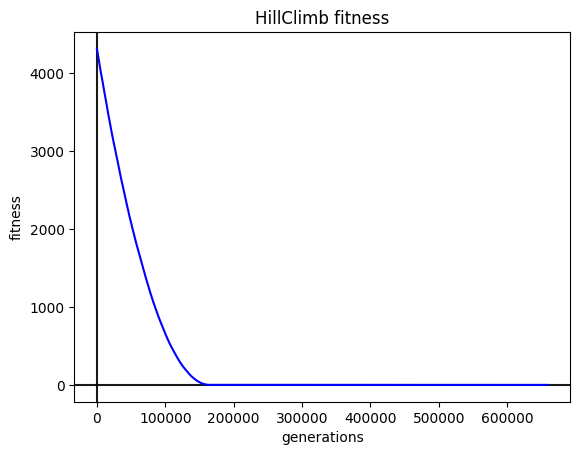

In [19]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()

## With an operator class

If we want a little bit more control of how our operator will be applied, we can make a class that inherits from the base ```Operator``` class.

We will need to implement the ```evolve``` method, which will receive a number of parameters shown below.

In [20]:
class OperatorCustom(Operator):
    def __init__(self, sigma, params=None, name=None):
        self.sigma = sigma
        super().__init__(params, name)

    def evolve(self, indiv, population, objfunc, global_best, initializer):

        # It is good practice to always make a copy of the individual to ensure that we don't
        # modify it directly
        new_indiv = copy(indiv)

        # We apply a mutation to the individual
        vector = new_indiv.genotype
        new_indiv.genotype = vector + np.random.normal(0, self.sigma, vector.shape)
        
        return new_indiv

op_custom = OperatorCustom(1e-3, name="GaussianNoise_Class")
op_custom.name

'GaussianNoise_Class'

We can once again use this operator as normal.

In [23]:
# Define the parameters of the optimization process
params = {
    "stop_cond": "time_limit",
    "time_limit": 10.0,

    "verbose": True,
    "v_timer": 2
}

# Define the objective function
objfunc = Sphere(3)

# Define a population initialization module
pop_init = UniformVectorInitializer(objfunc.vecsize, objfunc.low_lim, objfunc.up_lim, pop_size=1)

# Instanciate the newly created algorithm
algorithm = HillClimb(pop_init, operator)

# Define a Search method
search = GeneralSearch(objfunc, algorithm, params)

# Optimize the objective function 
best_solution, best_fitness = search.optimize()

Initializing optimization of Sphere function using HillClimb
------------------------------------------------------------

Optimizing Sphere function using HillClimb:
	Real time Spent: 0.0 s
	CPU time Spent:  0.0 s
	Generation: 0
	Best fitness: 3969.230304037032
	Evaluations of fitness: 1

Optimizing Sphere function using HillClimb:
	Real time Spent: 2.0 s
	CPU time Spent:  2.0 s
	Generation: 126909
	Best fitness: 147.46983606578084
	Evaluations of fitness: 126910

Optimizing Sphere function using HillClimb:
	Real time Spent: 4.0 s
	CPU time Spent:  4.0 s
	Generation: 257507
	Best fitness: 1.2006374055425796e-09
	Evaluations of fitness: 257508

Optimizing Sphere function using HillClimb:
	Real time Spent: 6.0 s
	CPU time Spent:  6.0 s
	Generation: 390636
	Best fitness: 6.090608505184558e-10
	Evaluations of fitness: 390637

Optimizing Sphere function using HillClimb:
	Real time Spent: 8.0 s
	CPU time Spent:  8.0 s
	Generation: 522916
	Best fitness: 6.090608505184558e-10
	Evaluations of 

Best solution: [-1.43851838e-05 -2.35914252e-06 -9.17375012e-06]
Solution fitness: 2.966567580215486e-10

Number of generations: 655950
Real time spent: 10.0s
CPU time spent: 9.99513s
Number of fitness evaluations: 655951
Best fitness: 2.966567580215486e-10


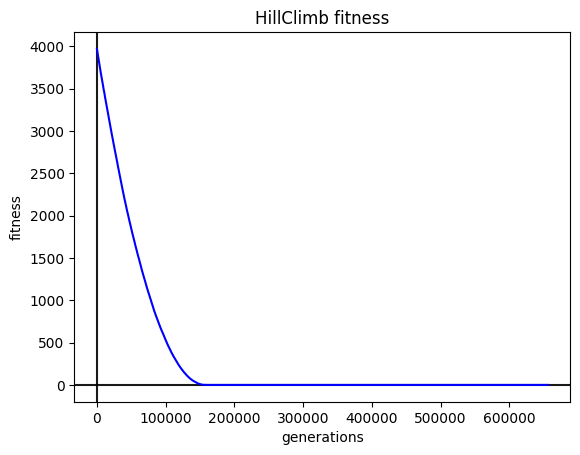

In [24]:
print(f"Best solution: {best_solution}")
print(f"Solution fitness: {best_fitness}\n")
search.display_report()